# Self-organizing Criticality
This is our week 9 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.
As usual, the first code block just imports the modules we will use.

In [133]:
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Frequency Distribution
When we make a large number of observations arising from a process, it is often useful to examine the frequency of the observed values. For example:
* when flipping a coin, what is the frequency of heads vs. tails?
* when rolling a pair of dice, what is the frequency of rolling each total: 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12?
* when grading papers, what is the frequency of test scores?
* when trialling a new vaccine, what is the frequency of a given side-effect?
* etc.

Since different processes result in distributions with distinct shapes, the shape of a distribution gives us clues or evidence about the underlying process that generated the observations.

### Uniform Distribution
A uniform distribution arises when each observation has the same probability, p, of occuring.   Examples would be flipping a coin (p = 0.5) or rolling a 6-sided die (p = 1/6)...

p(heads)= 0.5023  p(tails)= 0.4977


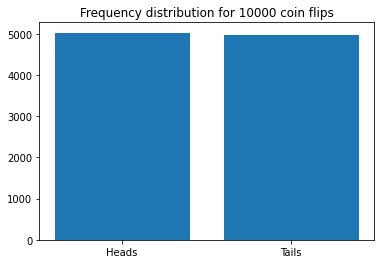

In [134]:
def flip():
    """ simulate a coin flip, return True if heads, False if tails """
    return np.random.random() < 0.5

n_tosses = 10000
tosses = [flip() for i in range(n_tosses)]
heads = sum(1 for t in tosses if t)
tails = n_tosses - heads
print("p(heads)=", heads/n_tosses, " p(tails)=",tails/n_tosses)

_, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title(f"Frequency distribution for {n_tosses} coin flips")
ax.bar(('Heads', 'Tails'), (heads, tails))
plt.show()

## Geometric distribution
A geometric distribution is the discrete cousin of the exponential distribution.  The most common observations are small-valued, and the number of observations drops off geometrically (exponentially) as observations get larger.  [https://en.wikipedia.org/wiki/Geometric_distribution](https://en.wikipedia.org/wiki/Geometric_distribution)
 Plotted on a linear scale, the shape of this distribution looks like exponential decay, asymtoptic to the x-axis.
 Plotted on a log scale, the distribution forms a straight line with a negative slope.

### Experiment:
Flip a coin and count the length of each "run on heads" (number of heads in a row)

In [135]:
def run_length():
    """ Flip a coin until Heads and continue to flip until Tails, return the number of heads in the run """
    while not flip():
        pass
    run = 1
    while flip():
        run += 1
    return run


def experiment(n):
    """ Run a coin flip experiment with n trials, return np.array with run length for each trial """
    trials = np.zeros(n, dtype='uint8')
    for i in range(n):
        trials[i] = run_length()
    return trials

print("Length of runs on Heads:")
experiment(10)

Length of runs on Heads:


array([4, 2, 4, 2, 1, 1, 2, 1, 1, 7], dtype=uint8)

If we interpret tossing "Tails" as a "success", then the length of a run-on-heads is "the number failures before success".
This yields the classic definition of a [Geometric Distribution](https://en.wikipedia.org/wiki/Geometric_distribution) with p = 0.5

10000 Trials: Avg. run length 1.9867  Max. run length: 16


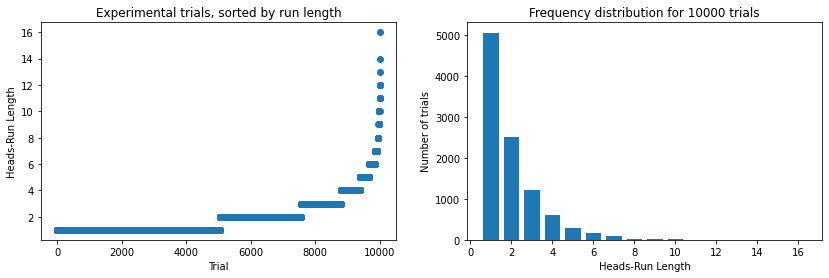

In [136]:
n_trials = 10000
trials = experiment(n_trials)

mean_run = trials.mean()
max_run = trials.max()
bins = np.arange(0.5, max_run + 1.5, 1.0)  # centre bins on integer run lengths.  Ugh.

print(n_trials, 'Trials: Avg. run length', mean_run, ' Max. run length:', max_run)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.plot(sorted(trials), 'o')
ax1.set_title("Experimental trials, sorted by run length")
ax1.set_xlabel('Trial')
ax1.set_ylabel('Heads-Run Length')

ax2.hist(trials, bins, rwidth=0.75)
ax2.set_title(f"Frequency distribution for {n_trials} trials")
ax2.set_xlabel('Heads-Run Length')
ax2.set_ylabel('Number of trials')
plt.show()

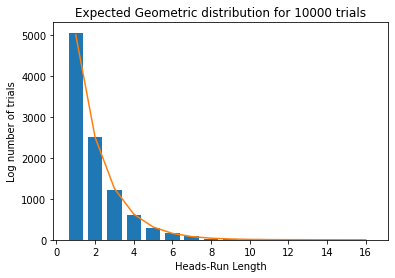

In [137]:
# predicted geometric sequence for run lengths - each bin has 1/2 of the remaining tosses.
n_bins = len(bins)-1
xs = np.linspace(1., max_run, num=n_bins)
ys = [n_trials/2**i for i in range(1, n_bins+1)]  # p(n) = 1/2**n

_, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.hist(trials, bins, rwidth=0.75)
ax.plot(xs, ys)
# ax.set_yscale("log")
ax.set_title(f"Expected Geometric distribution for {n_trials} trials")
ax.set_xlabel("Heads-Run Length")
ax.set_ylabel("Log number of trials")
plt.show()

# Heavy-tailed distributions
A "heavy-tail" (or "long-tailed") distribution has a similar shape to a geometric or exponential distribution, except that the probability of observaions out in the "tail" are more frequent that predicted by a purely geometric sequence.
A heavy-tailed distribution decays slower, so lies above a geometric or exponential distribution with the same mean.
Many natural processes are observed to have "heavy-tailed" distributions:
 * wealth distribution
 * forest fire size
 * earthquake magnitude
 * file sizes


## Probability Mass Functions
The examples above show the probabiliity of various observations of a discrete process based on flipping a coin.

For any kind of discrete observation (e.g., integer or categorical), each value has a distinct probability of being observed.
The "Probablity Mass Function" (PMF) is a function that gives us the theoretical probablity for each observation.

Here's another example, with dice this time...

p(2)=0.0287, p(3)=0.0592, p(4)=0.0813, p(5)=0.1067, p(6)=0.1375, p(7)=0.1692, p(8)=0.139, p(9)=0.1092, p(10)=0.0846, p(11)=0.0562, p(12)=0.0284

Theoretical Probablilty Mass Function for 2 fair 6-sided dice:
   pmf(n) when 2 < n < 12, 0 otherwise

pmf(2)=0.028, pmf(3)=0.056, pmf(4)=0.083, pmf(5)=0.111, pmf(6)=0.139, pmf(7)=0.167, pmf(8)=0.139, pmf(9)=0.111, pmf(10)=0.083, pmf(11)=0.056, pmf(12)=0.028


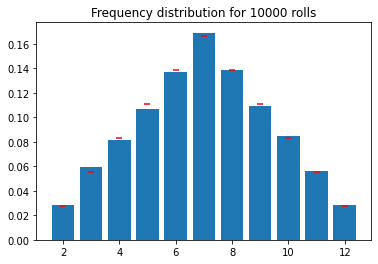

In [138]:
def roll(sides=6):
    """ simulate an n-sided dice roll.  Return int value on die face. """
    return np.random.choice(range(1, sides+1))

def roll_dice(n_rolls=2, sides=6):
    """ simulate rolling n dice and return the sum of their face values """
    return sum(roll(sides) for r in range(n_rolls))

# Setup the experiment:
n_sides = 6
n_dice = 2
min_roll = n_dice
max_roll = n_dice*n_sides
possible_rolls = range(min_roll, max_roll+1)
n_rolls = 10000

# Theoretical probability mass function (for 2-dice only)
roll_p = 1 / (n_sides**n_dice)  # probability of a given "ordered" roll - not the sum of the roll!
def pmf(n):
    """ Probability Mass Function - return probability of seeing a roll of 2 dice with sum n """
    mid_roll = list(possible_rolls)[ len(possible_rolls)//2 ]
    return 0 if n < min_roll or n > max_roll else \
           roll_p * (n-1) if n <= mid_roll else \
           roll_p * (max_roll+1 - n)

PMF = [pmf(v) for v in possible_rolls]

# Run the experiment and make a histogram of results
rolls = [roll_dice(n_dice, n_sides) for i in range(n_rolls)]
counts = [sum(1 for r in rolls if r==v) for v in possible_rolls]

# Output
print(', '.join( ['p({n})={p}'.format(n=v, p=counts[v-min_roll]/n_rolls) for v in possible_rolls] ))
print('''
Theoretical Probablilty Mass Function for 2 fair {n}-sided dice:
   pmf(n) when {min} < n < {max}, 0 otherwise
'''.format(n=n_sides, min=min_roll, max=max_roll))
print(', '.join( ['pmf({n})={p}'.format(n=v, p=round(PMF[v-min_roll], 3)) for v in possible_rolls] ))

_, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title(f"Frequency distribution for {n_rolls} rolls")
ax.bar(possible_rolls, [count/n_rolls for count in counts])
ax.scatter(possible_rolls, PMF, c='red', marker='_')
plt.show()

### Poisson Process
A Poisson Process describes a counting process where "events" occur randomly at a fixed rate (in time or space).  Examples would include the number of shoppers arriving at a store per hour,  or the number cellphone towers in a city block.

Here we will simulate a recurring event (let's imagine its forest fire :-) with a fixed probability of occurring in any time period, and count the number of "fires" per time period.

Fires per period: min=0, max=13, mean=4.46


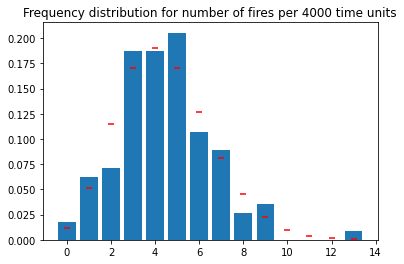

In [139]:
# Setup the experiment
mean_interval = 1000  # average time interval between fire ignitions in some unit time
f = 1/mean_interval   # fire ignition rate (per unit time)

n_observations = 500  # total number of ignition observations to make
avg_per_interval = 4  # the interval size so we expect, on average, N fires per interval
period_size = avg_per_interval * mean_interval


def ignition():
    """ return True iff there is an ignition event """
    return np.random.random() < f

def next_ignition():
    """ return the number of time units elapsed to next ignition """
    steps = 0
    while not ignition():
        steps+=1    # one more time unit without an ignition...
    return steps

def get_ignitions(n_event):
    """ return an array with time units elapsed between each subsequent ignition event """
    return np.array( [ next_ignition() for event in range(n_event) ] )

def get_counts_per_period(intervals, period):
    """ return a histogram from fire intervals with number of fires per observation period  """
    # histogram has a fixed "bin" size given by period
    counts = [0]
    time_step = 0
    for t in intervals:
        time_step += t
        if time_step < period:
            counts[-1] += 1
        else:  # crossed a period boundary - zero out any empty bins, count t, and reset time_step
            counts += [0] * (time_step // period)
            time_step = time_step % period
            counts[-1] += 1
    return counts

# Run the experiment and create a histogram of fires per time period
ignition_intervals = get_ignitions(n_observations)
counts = get_counts_per_period(ignition_intervals, period_size)
mean = np.mean(counts)
print("Fires per period: min={min}, max={max}, mean={mean}".format(min=min(counts), max=max(counts), mean=round(mean, 2)))

_, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title(f"Frequency distribution for number of fires per {period_size} time units")
xs = range(0, max(counts)+1)
hist = [sum(1 for c in counts if c==x)/len(counts) for x in xs]
ax.bar(xs, hist)

# Theoretical exponential PMF
ax.scatter(xs, stats.poisson.pmf(xs, mu=mean), c='red', marker='_')
plt.show()

## Probablity Density Functions
When observations take on continuous values, the probability function is also continuous.
This means the probablity of observing any exact value is zero.

In such systems, it only makes sense to talk about probability over some interval, which is the area under the curve (integral!) of the "Probability Density Function" on that interval.

### Negative Exponential
If we count the elapsed time between events in a Poisson Process, we get an Exponential PDF with a negative coefficient.  Examples would include time between shoppers arriving at a store.

So, extending our experiment above, we'll examine the elapsed time between fires (fire intervals)...

Fires intervals: min=0, max=5974, mean=893.0


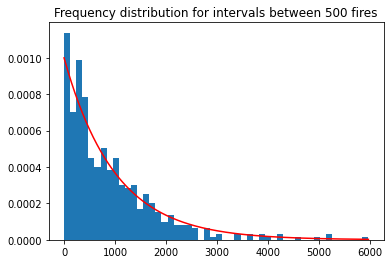

In [140]:
print("Fires intervals: min={min}, max={max}, mean={mean}".format(
    min=round(min(ignition_intervals)), max=round(max(ignition_intervals)), mean=np.round(np.mean(ignition_intervals))
))

_, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title(f"Frequency distribution for intervals between {n_observations} fires")
ax.hist(ignition_intervals, bins=n_observations//10, density=True)

# Theoretical exponential PDF
xs = np.linspace(min(ignition_intervals), max(ignition_intervals), n_observations)
ax.plot(xs, stats.expon.pdf(xs, scale=mean_interval), c='red')
plt.show()

# TODO
* Cummulative Density Functions